## **Reconstruction**

### Prepare the data
* Import related libraries
* Load data
  * Divide your dataset into training (80%), validation (10%) and test (10%). Normalize the data.
  * \# of training instances: 60000 * 80% = 48000
  * \# of validation/test instances: 60000 * 10% = 6000 each

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras

In [ ]:
#import CIFAR-10 dataset
#won't need the labels, so leave y_train, y_test empty
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)

In [ ]:
#preprocessing 
x_all = np.vstack((x_train, x_test))

#Normalize the data
x_all = x_all.astype('float32') / 255

#Split into train, validation, test 
x_train, x_validate, x_test = np.split(x_all, [int(0.8*60000), int(0.9*60000)])

In [ ]:
#check the shape 
print(x_train.shape, x_validate.shape, x_test.shape)

(48000, 32, 32, 3) (6000, 32, 32, 3) (6000, 32, 32, 3)


### Build the encoder/decoder network
* Define each layer of CNN, in total 9 layers
* Compile and output the network summary

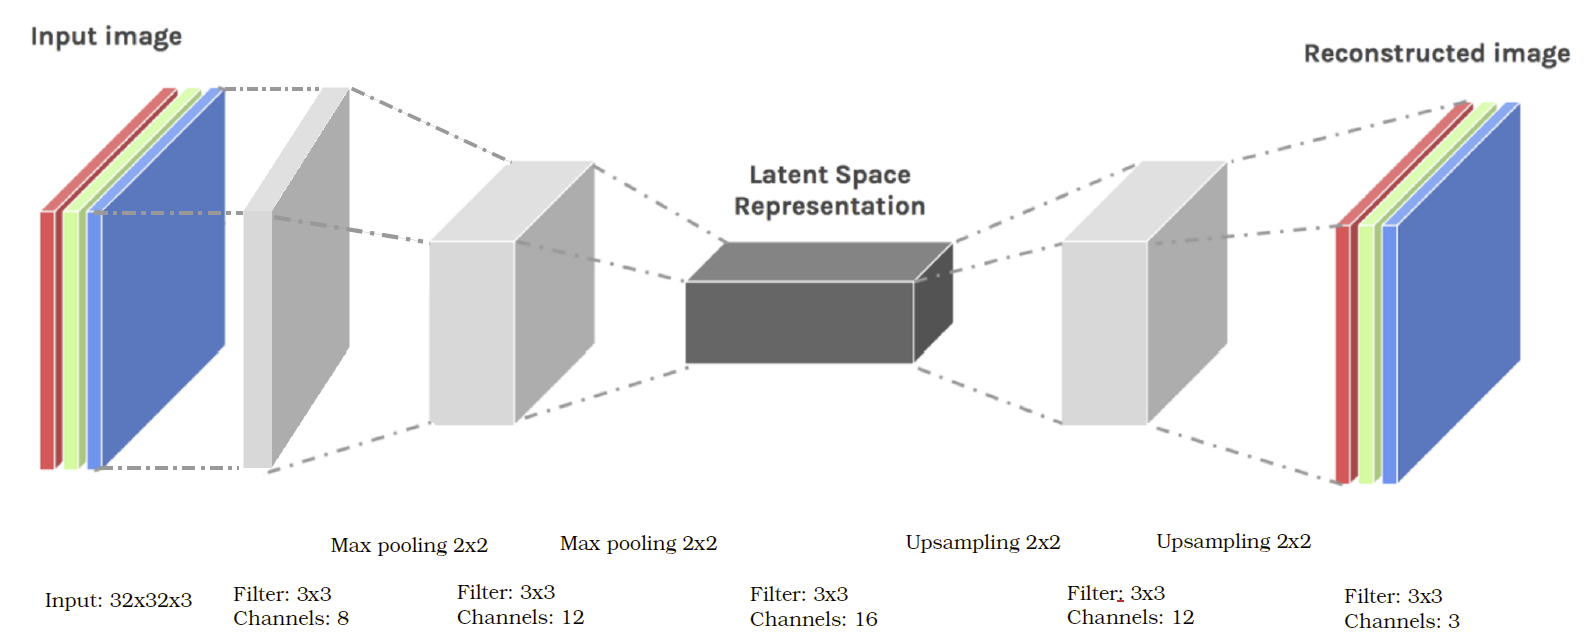

In [ ]:
#Encoder  
input_img = keras.layers.Input(shape=(32, 32, 3))                          
x = keras.layers.Conv2D(8, (3, 3), activation = 'relu', strides=1, padding = 'same')(input_img)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)

#Decoder 
x  = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(3, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)


In [ ]:
autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0     

In [ ]:
# try fit the data for 10 epochs
cnn = autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_validate, x_validate))

Epoch 1/10
1500/1500 [==============================] - 40s 7ms/step - loss: 0.5903 - val_loss: 0.5742
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5757 - val_loss: 0.5713
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5719 - val_loss: 0.5732
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5694 - val_loss: 0.5681
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5681 - val_loss: 0.5690
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5687 - val_loss: 0.5669
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5664 - val_loss: 0.5656
Epoch 8/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5723 - val_loss: 0.5667
Epoch 9/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5677 - val_loss: 0.5702
Epoch 10/10
1500/1500 [==============================] - 10s 7ms/step - l

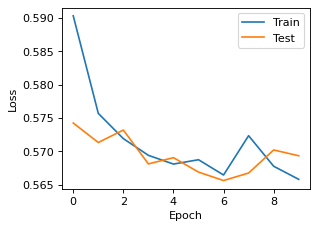

In [ ]:
#Plot training errors & testing errors
#plt.title("Loss")
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Reconstruct the images

#### Config 1
* epochs=10
* loss="binary_crossentropy"
* activation = 'relu', for all layers

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)

In [ ]:
#define a function to display 12 original(true) images 
#in comparison with 12 re-construction images

def reconstruct(array_true, array_pred):
  fig, axes = plt.subplots(1, 12, figsize=(12, 12))
  for i, ax in enumerate(axes.flat):
    ax.imshow(array_true[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  fig, axes = plt.subplots(1, 12, figsize=(12, 12))
  for i, ax in enumerate(axes.flat):
    ax.imshow(array_pred[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


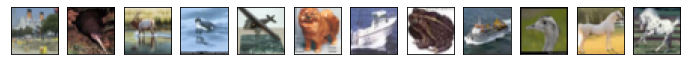

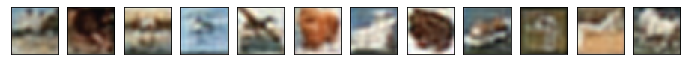

In [ ]:
# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

---

* try fit the data for 25, 50, 75 epochs respectively

#### Config 2
* epochs=25
* loss="binary_crossentropy"
* activation = 'relu', for all layers


In [ ]:
# try fit the data for 25 epochs
cnn = autoencoder.fit(x_train, x_train, epochs= 25, validation_data=(x_validate, x_validate), shuffle=True)

Epoch 1/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5759 - val_loss: 0.5718
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5703 - val_loss: 0.5704
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5656 - val_loss: 0.5661
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5646 - val_loss: 0.5648
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5680 - val_loss: 0.5653
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5636 - val_loss: 0.5640
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5669 - val_loss: 0.5636
Epoch 8/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5630 - val_loss: 0.5643
Epoch 9/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5632 - val_loss: 0.5624
Epoch 10/25
1500/1500 [==============================] - 10s 7ms/step - l

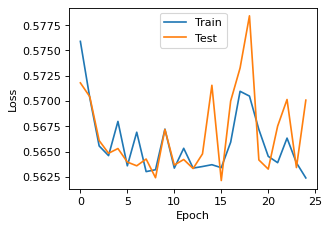

In [ ]:
#Plot training errors & testing errors
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


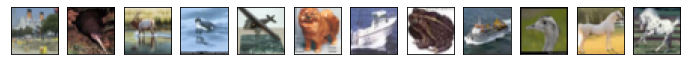

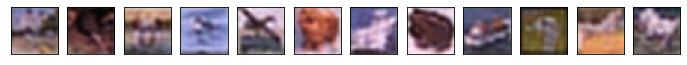

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)
# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

#### Config 3
* epochs=50
* loss="MeanSquaredError"
* activation = 'relu', for all layers


In [ ]:
#change the loss function to MSE
autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="MeanSquaredError")
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 16, 16, 16)        0   

In [ ]:
# try fit the data for 50 epochs
cnn = autoencoder.fit(x_train, x_train, epochs= 50, validation_data=(x_validate, x_validate), shuffle=True)

Epoch 1/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0123 - val_loss: 0.0065
Epoch 2/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 3/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 8/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 9/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 10/50
1500/1500 [==============================] - 10s 7ms/step - l

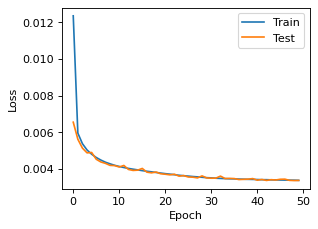

In [ ]:
#Plot training errors & testing errors
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


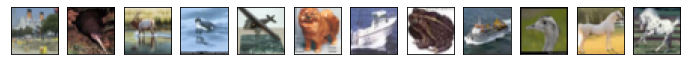

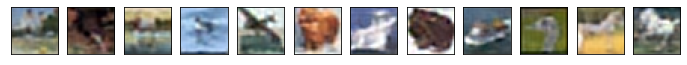

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)
# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

#### Config 4
* epochs=50
* loss="binary_crossentropy"
* activation = 'relu', for all layers **except the last**, last activation = 'sigmoid'

In [ ]:
#Encoder  
input_img = keras.layers.Input(shape=(32, 32, 3))                          
x = keras.layers.Conv2D(8, (3, 3), activation = 'relu', strides=1, padding = 'same')(input_img)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)

#Decoder 
x  = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(3, (3, 3), activation = 'sigmoid', strides=1, padding = 'same')(x)

autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0     

In [ ]:
# try fit the data for 50 epochs
cnn = autoencoder.fit(x_train, x_train, epochs= 50, validation_data=(x_validate, x_validate), shuffle=True)

Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5751 - val_loss: 0.5675
Epoch 2/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5644 - val_loss: 0.5640
Epoch 3/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5624 - val_loss: 0.5628
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5614 - val_loss: 0.5619
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5607 - val_loss: 0.5617
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5602 - val_loss: 0.5609
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5598 - val_loss: 0.5606
Epoch 8/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5594 - val_loss: 0.5605
Epoch 9/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5592 - val_loss: 0.5608
Epoch 10/50
1500/1500 [==============================] - 10s 7ms/step - l

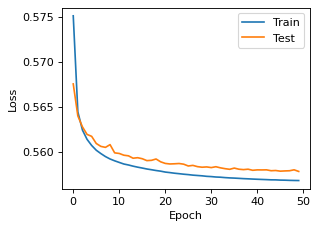

In [ ]:
#Plot training errors & testing errors
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

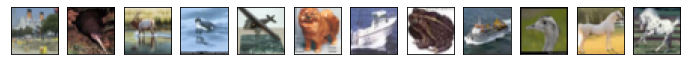

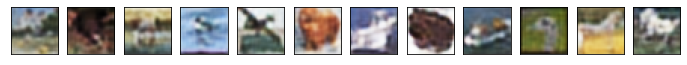

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)

# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

#### Config 5
* epochs=75
* loss="binary_crossentropy"
* activation = 'relu', for all layers **except the last**, last activation = 'sigmoid'

In [ ]:
# try fit the data for 75 epochs
cnn = autoencoder.fit(x_train, x_train, epochs= 75, validation_data=(x_validate, x_validate), shuffle=True)

Epoch 1/75
1500/1500 [==============================] - 41s 7ms/step - loss: 0.5746 - val_loss: 0.5660
Epoch 2/75
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5635 - val_loss: 0.5632
Epoch 3/75
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5616 - val_loss: 0.5619
Epoch 4/75
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5607 - val_loss: 0.5612
Epoch 5/75
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5600 - val_loss: 0.5612
Epoch 6/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5596 - val_loss: 0.5604
Epoch 7/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5592 - val_loss: 0.5600
Epoch 8/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5589 - val_loss: 0.5598
Epoch 9/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5587 - val_loss: 0.5595
Epoch 10/75
1500/1500 [==============================] - 10s 7ms/step - l

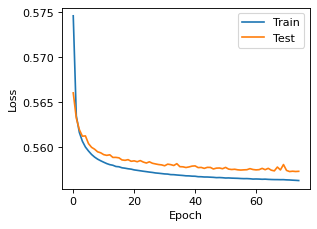

In [ ]:
#Plot training errors & testing errors
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

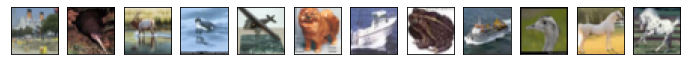

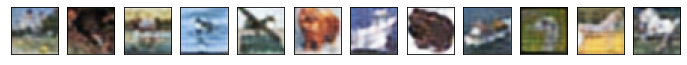

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)

# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

---
## **Colorization**

### Prepare the data
* import libraries and dataset
* turn RGB into grayscale
* split the dataset into train, validation, test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from skimage import color # change color space

#import CIFAR-10 dataset
#won't need the labels, so leave y_train, y_test empty
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)


170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
#Preprocessing 
x_all = np.vstack((x_train, x_test))

#Normalize the data
x_norm = x_all.astype('float32') / 255

#Revome colors
x_grey = color.rgb2gray(x_norm)

#Split into train, validation, test
x_train, x_validate, x_test = np.split(x_norm, [int(0.8*60000), int(0.9*60000)]) 
x_gtrain, x_gvalidate, x_gtest = np.split(x_grey.reshape((60000, 32, 32, 1)) , [int(0.8*60000), int(0.9*60000)])

In [ ]:
#check the shape 
print(x_train.shape, x_validate.shape, x_test.shape)
print(x_gtrain.shape, x_gvalidate.shape, x_gtest.shape)

(48000, 32, 32, 3) (6000, 32, 32, 3) (6000, 32, 32, 3)
(48000, 32, 32, 1) (6000, 32, 32, 1) (6000, 32, 32, 1)


In [ ]:
#check the grayscale images
fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_gtrain[i].reshape(32,32), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Build the encoder/decoder

In [ ]:
#Encoder  
input_img = keras.layers.Input(shape=(32, 32, 1))                          
x = keras.layers.Conv2D(8, (3, 3), activation = 'relu', strides=2, padding = 'same')(input_img)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
#x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)

#Decoder 
x  = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(3, (3, 3), activation = 'tanh', strides=1, padding = 'same')(x)

autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 8)         80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 12)          876       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 12)        1740

In [ ]:
# try fit the data for 40 epochs
cnn = autoencoder.fit(x=x_gtrain, y=x_train, epochs= 40, validation_data=(x_gvalidate, x_validate), shuffle=True)

Epoch 1/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 2/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 3/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 4/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 5/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 6/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 7/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 8/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 9/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 10/40
1500/1500 [==============================] - 10s 7ms/step - l

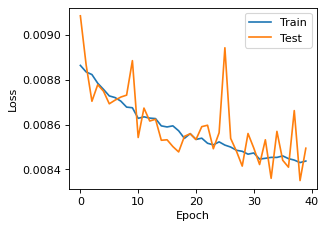

In [ ]:
#Plot training errors & testing errors
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def reconstruct(array_true, array_pred):
  fig, axes = plt.subplots(1, 12, figsize=(12, 12))
  for i, ax in enumerate(axes.flat):
    ax.imshow(array_true[i].reshape(32,32), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  

  fig, axes = plt.subplots(1, 12, figsize=(12, 12))
  for i, ax in enumerate(axes.flat):
    ax.imshow(array_pred[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
  plt.show()

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_gtest)

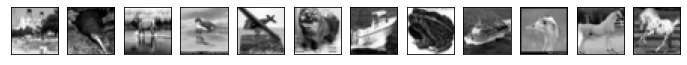

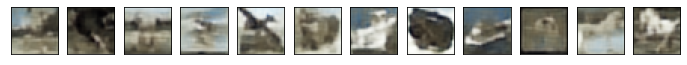

In [ ]:
# compare the origin with the reconstructed output
reconstruct(x_gtest, output_img)

---

### Try predicting the chrominance

> (**from the assignment pdf**)  (Hint) A neat trick is to not predict the full color image, but only its chrominance - the proportion of the image determining the colors but not the luminance. By predicting the chrominance, we relieve the model of also reconstructing
the details (such as contours) that we already have in the grayscale image. The predicted chrominance can then be
merged with the luminance captured in grayscale to reconstruct the full image.

In [ ]:
#turn into yuv colorspace to retain/keep the chrominance 
x_yuv = color.rgb2yuv(x_norm)

#turn into lab colorspace to retain/keep the luminance 
x_lab = color.rgb2lab(x_norm)

#Split into train, validation, test
x_ctrain, x_cvalidate, x_ctest = np.split(x_yuv, [int(0.8*60000), int(0.9*60000)]) 
x_ltrain, x_lvalidate, x_ltest = np.split(x_lab, [int(0.8*60000), int(0.9*60000)]) 

In [ ]:
#check the shape 
print(x_ctrain.shape, x_cvalidate.shape, x_ctest.shape)
print(x_ltrain.shape, x_lvalidate.shape, x_ltest.shape)

(48000, 32, 32, 3) (6000, 32, 32, 3) (6000, 32, 32, 3)
(48000, 32, 32, 3) (6000, 32, 32, 3) (6000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

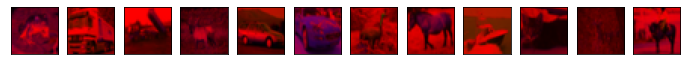

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

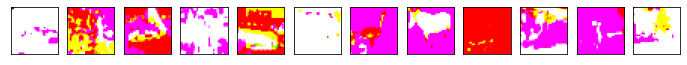

In [ ]:
#have a look at the preprocessed images
fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_ctrain[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_ltrain[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Encoder  
input_img = keras.layers.Input(shape=(32, 32, 1))                          
x = keras.layers.Conv2D(8, (3, 3), activation = 'relu', strides=2, padding = 'same')(input_img)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
#x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)

#Decoder 
x  = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(3, (3, 3), activation = 'tanh', strides=1, padding = 'same')(x)

autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 12)          876       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 12)        1740  

In [ ]:
# train on grayscale images and images in yuv colorspace 
# yuv captures the chrominance of an image, 
cnn = autoencoder.fit(x=x_gtrain, y=x_ctrain, epochs= 50, validation_data=(x_gvalidate, x_cvalidate), shuffle=True)

Epoch 1/50
1500/1500 [==============================] - 41s 7ms/step - loss: 0.0060 - val_loss: 0.0044
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 9/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10/50
1500/1500 [==============================] - 11s 7ms/step - l

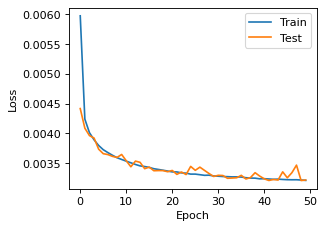

In [ ]:
#Plot training errors & testing errors
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Reconstruct the image using test set
output_img_yuv = autoencoder.predict(x_gtest)

Original images in grayscale


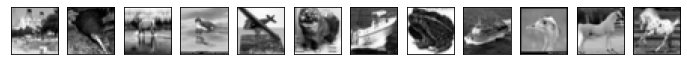

Original images in color


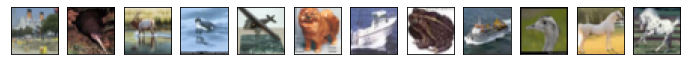

Reconstructed images in color (training on images in grayscale)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


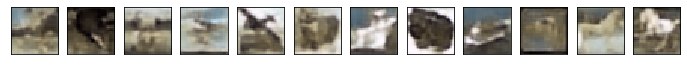

In [ ]:
# compare the origin with the reconstructed output
print('Original images in grayscale')
fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_gtest[i].reshape(32, 32), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print('Original images in color')
fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_test[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print('Reconstructed images in color (training on images in grayscale)')
fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(color.yuv2rgb(output_img_yuv)[i], interpolation='none')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
